# Trabajo práctico Nº 2 

Manejo de puerto serie - Notebook disponible en [GitHub](https://github.com/matias-dogliani/diseno_digital/blob/master/tp2/tp2.ipynb)

* Comenzamos primero cargando la función de calculadora del práctico anterior 

In [1]:
import numpy as np

def calculadora(): 
     while(1):
        print(' 1 - Calcular \n', 
            '2 - Terminar ')
        cc = int(input(' Elija una opcion: '))
        if (cc == 1): 
            menu()
        else: 
            return 

def menu():                                                                 
                                                                                
    print('1 - Sumar',                                                          
          '2 - Restar',                                                         
          '3 - Multiplicar',                                                    
          '4 - Dividir',                                                        
          '5 - Iterativo',                                                      
          '6  - Producto punto', sep = '\n')                                          
                                                                                
    op = int(input('Elija una ocpion: '))                                       
                                                                                
                                                                                
    if (op == 1):                                                               
         suma()                                                                 
                                                                                
    elif (op == 2):                                                             
         resta()                                                                
                                                                                
    elif (op == 3):                                                             
          mult()                                                                
                                                                                
    elif (op == 4):                                                             
        dividir()                                                               
                                                                                
    elif (op == 5):                                                             
        iterativo()                                                             
                                                                                
    elif (op == 6):                                                             
         producto_p()                                                              
                                                                                
def suma():                                                                     
                                                                                
    a,b = input('Ingrese dos numeros para sumar:  ').split()                    
    print('Resultado  = ', int(a) + int(b)  )                                   
                                                                                
def resta():                                                                    
                                                                                
    a,b = input('Ingrese dos numeros para restar: ').split()                    
    print('Resultado  = ', int(a) - int(b)  )                                   
                                                                                
def mult():                                                                     
                                                                                
    a,b = input('Ingrese dos numeros para multiplicar: ').split()               
    print('Resultado  = ', int(a) * int(b)  )                                   
                                                                                
                                                                                
def dividir():                                                                 
                                                                                
    a,b = input('Ingrese dos numeros para dividir: ').split()                   
    print('Resultado  = {:.2f}'.format(int(a) / int(b)))      
def iterativo():                                                                
                                                                                
    step = int(input('Ingrese el paso: '))                                      
    i = int(input('Ingrese las iteraciones: '))                                 
                                                                                
    a=0                                                                         
    b=0                                                                         
    c=1                                                                         
                                                                                
    while(i>0):                                                                 
        a += step                                                               
        b -= step                                                               
        c *= step                                                               
        i-=1                                                                    
    print('a = {}  b = {}  c = {} \n '.format(a,b,c))     
    
                                                            
                                                                                
def producto_p(): 
    op =1
    while(op):
        F1 = int(input("Numero de filas de matriz 1 : "))                           
        C1 = int(input("Numero de columnas matriz 1 : "))                                                                                                           
        print("Ingresar matriz por filas, separado por espacio ")                       
        elementos = list(map(int, input().split()))                                     
        matriz1 = np.array(elementos).reshape(F1, C1)                               
                                                                                
        F2 = int(input("Numero de filas de matriz 2 : "))                               
        C2 = int(input("Numero de columnas matriz 2:  ")) 
        print("Ingresar matriz por filas, separado por espacio ")                       
        elementos = list(map(int, input().split()))                                     
        matriz2= np.array(elementos).reshape(F2, C2)                                
                                                    
                                                                                
        if (matriz1.shape != matriz2.shape):                                              
            print("No se puede realizar la operacion",                              
              "las matrices deben tener el mismo tamaño")
        else: 
            break                                                                            
                             
    res = matriz1*matriz2 
    guardar_archivo(matriz1,matriz2,res)
    print("Resultado = ", res)                                                                                       

def guardar_archivo(a,b,c):                                                          
                                       
    fd = open("./matrix.log", "w")                                              
    fd.write("Matriz a \n")    
    for fila in a:                                                            
         np.savetxt(fd,fila)                                                     
    
    fd.write("Matriz b \n")    
    for fila in a:                                                            
         np.savetxt(fd,fila)
    
    fd.write("Matriz resultado \n")    
    for fila in a:                                                            
         np.savetxt(fd,fila)
    
    fd.close()   

Definimos la funcion graficar() 

In [2]:
import matplotlib.pyplot as plt 
def graficar( samples   = np.random.normal(0, 0.1, 30000)): 
    plt.plot(samples)

## Ejercicio a) 

Enviar por puerto un comando para que el recepetor ejecute la correspondiente acción 

1) Abrimos el puerto de tal forma que nos permita emular emisor y receptor

In [3]:
import serial                                                                   
                                                                                
ser = serial.serial_for_url('loop://', timeout=1)                               
                                                                                
ser.timeout=None                                                                
                                                                                
ser.flushInput()                                                                
ser.flushOutput()                                                               
                  

2) Configuramos el emisor con los comandos correspondientes 

In [4]:
                                                                             
comandos = ['CALCULADORA','GRAFICAR','SALIR']                                   
data = ''                                                                       
                                                                                
while(1):                                                                       
                                                                                
    print("'Calculadora': Ejecuta calculadora",                                 
        "'Graficar': Grafica un vector aleatorio",                              
        "'Salir': Finalizar programa",sep = '\n')                               
    data = input("Ingrese un comando: ")                                        
                                                                                
    if data.upper() in comandos:                                                 
        break                                                                   
    else:                                                                       
        print("No existe el comando", data,"\n")                                
                                                               
                                                                        
ser.write(data.encode())       

'Calculadora': Ejecuta calculadora
'Graficar': Grafica un vector aleatorio
'Salir': Finalizar programa
Ingrese un comando: graficar


8

3) Configuramos el emisor, para que según el comando enviado ejecute la acción correspondiente 

Comando recibido >> graficar


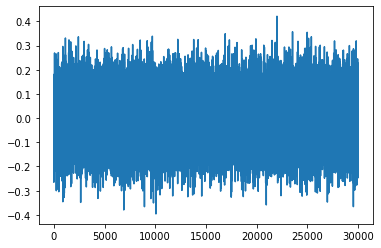

In [5]:
out = ''                                                                        
while ser.inWaiting() > 0:                                                      
    read_data = ser.read(1)                                                     
    out += read_data.decode()                                                   
                                                                                
if out != '':                                                                   
    print("Comando recibido >> " + out) 
    
if out.upper() == 'CALCULADORA' : 
    calculadora()
elif out.upper() == "GRAFICAR": 
    graficar()
elif out.upper() == "SALIR": 
    if ser.isOpen():                                                            
        print("Programa terminado")                                             
        ser.close()                                                             
    exit()                                                                      
   

## Ejercicio B 

Comunicación con trama definida: 
* Cabecera 
    * Size 
    * Datos 
    * Device 
* Fin de trama


1) Codificamos la trama **corta** 

In [6]:
def Short_TramaEnconder(data):                                                  
                                                                                
    trama = []                                                                  
                                                                                
    if len(data) >16:                                                           
        return -1                                                               
                                                                                
    cabecera =  bytes([160 + len(data)])                                        
    fin_trama = bytes([64 + len(data)])                                         
    trama.append(cabecera)                                                      
                                                                                
    #LSize_low y LSize_high                                                     
    trama.append(bytes([0]))                                                    
    trama.append(bytes([0]))                                                    
                                                                                
    trama.append(bytes([0]))                                                    
                                                                                
    for byte in data:                                                           
        trama.append(byte)                                                      
                                                                                
    trama.append(fin_trama)                                                     
    return trama                     

2) Codificamos la trama **larga** 

In [7]:
                                                                                
def Large_TramaEnconder(data,len_data = 0 ):                                        
                                                                                
    trama = []                                                                  
    if len_data == 0:                                                           
        len_data = len(data)  # Esto es para poder mandar graficar por esta trama
                                                                                
    if len(data) > 2**(16):                                                     
        return -1                                                               
                                                                                
    cabecera =  bytes([176])                                                    
    fin_trama = bytes([64])                                                         
    trama.append(cabecera)                                                      
                                                                                
    #LSize_low y LSize_high             
    #LSize_high = len_data >> 8 
    #LSize_low = len_data & 0000000011111111
    trama.append(bytes([len_data // 255 ]))                                     
    trama.append(bytes([len_data - (len_data // 255) * 255 ]))                  
                                                                                
    trama.append(bytes([0]))                                                        
                                                                                
    for byte in data:                                                           
        trama.append(byte)                                                      
                                                                                
    trama.append(fin_trama)                                                     
    return trama                                                                
                                

3) Armamos la trama según corresponda

In [8]:
import random 
import serial 
comandos = ['CALCULADORA','GRAFICAR','SALIR']                                   
data = ''                                                                       
                                                                                
while(1):                                                                       
                                                                                
    print("'Calculadora': Ejecuta calculadora",                                 
        "'Graficar': Grafica un vector aleatorio",                              
        "'Salir': Finalizar programa",sep = '\n')                               
    data = input("Ingrese un comando: ")                                        
                                                                                
    if data.upper() in comandos:                                                 
        break                                                                   
    else:                                                                       
        print("No existe el comando", data,"\n")                 

datos = []                                                                      
for char in data:                                                               
    datos.append(char.encode())                                                 
                                                                                
                                                                                
if data.upper() == 'GRAFICAR':                                                  
    for i in range(10):                                                         
        dato_graficar = random.randint(0,255) #Vector a graficar                
        byte = dato_graficar.to_bytes(1, byteorder='big', signed=False)         
        datos.append(byte)                                                      
    trama = Large_TramaEnconder(datos, len(data))                               
if data.upper() == 'CALCULADORA':                                               
    trama = Short_TramaEnconder(datos)                                          
if data.upper() == 'SALIR':                                                     
    trama = Short_TramaEnconder(datos)  

'Calculadora': Ejecuta calculadora
'Graficar': Grafica un vector aleatorio
'Salir': Finalizar programa
Ingrese un comando: calculadora


4) Implementamos el **emisor** 

In [9]:
import serial as ser 
ser = serial.serial_for_url('loop://', timeout=1)                               
                                                                           
ser.timeout=None                                                                
ser.flushInput()                                                                
ser.flushOutput() 

if ser.isOpen():                                                                
    for byte in trama:                                                          
       print("Enviado ",  byte)                                                 
       ser.write(byte)                                                          
                                           
                             

Enviado  b'\xab'
Enviado  b'\x00'
Enviado  b'\x00'
Enviado  b'\x00'
Enviado  b'c'
Enviado  b'a'
Enviado  b'l'
Enviado  b'c'
Enviado  b'u'
Enviado  b'l'
Enviado  b'a'
Enviado  b'd'
Enviado  b'o'
Enviado  b'r'
Enviado  b'a'
Enviado  b'K'


5) Configuramos el **receptor** 
    
    Se puede añadir una validación con el byte de final de trama que disparece cierto evento. En el caso de una trama larga se podría comprobar con : 
   
   `if fin_trama  != 64:                                                           
        print("ERROR: Trama corrupta")`


In [10]:
out = []                                                                        
if ser.isOpen():                                                                
    print("Esperando", ser.inWaiting(), "datos")                                
    while ser.inWaiting() > 0:                                                  
         read_data = ser.read(1)                                                
         print("Recibido ", read_data)                                          
         out.append(read_data)                                                  
fin_trama =  int.from_bytes(out[len(out)-1],byteorder='big',signed = False)     
                                                                    
                                 
            

Esperando 16 datos
Recibido  b'\xab'
Recibido  b'\x00'
Recibido  b'\x00'
Recibido  b'\x00'
Recibido  b'c'
Recibido  b'a'
Recibido  b'l'
Recibido  b'c'
Recibido  b'u'
Recibido  b'l'
Recibido  b'a'
Recibido  b'd'
Recibido  b'o'
Recibido  b'r'
Recibido  b'a'
Recibido  b'K'


6) En el lado del receptor, desarmamos la trama: 
    Ya que 'graficar' es un caso especial a la trama larga 
    hay que tener en cuenta algunos puntos tanto como para armar la trama como para desarmarla.Si no se enviase graficar y se enviara un dato largo, el dato sería la parte correspondiente al dato y no se separaría en **comando** y **datos** como se hace en este caso 

In [11]:
                                                                               
cabecera = int.from_bytes(out[0], byteorder = 'big', signed = False)            
                                                                                
                                                                                
if (cabecera & int(b'00010000')):           #Trama Larga                        
    data_len = int.from_bytes(out[1], byteorder = 'big', signed = False)        
    data_len = data_len * 255 +  int.from_bytes(out[2],         #Largo del comando para el caso de 
                byteorder = 'big', signed = False)              # 'graficar'       
                                                                                
    if( data_len < len(out[4:-1]) ) :   #El caso de graficar                    
         comando = [char.decode() for char in out[4:4+data_len] ]               
         comando = "".join(comando)                                             
    else:                                                                       
        dato = out[4:-1]                                                        
                                                                                
else:                               #Trama corta                                
    data_len  = cabecera - 160                                                  
    comando = [char.decode() for char in out[4:4+data_len] ]                    
    comando = "".join(comando)                                                  
                                  
                                

7) Por último, lanzamos la función correspondiente según el comando recibido

In [12]:
                                                                             
if comando.upper() == 'CALCULADORA' :                                           
    calculadora()                                                               
elif comando.upper() == "GRAFICAR":                                             
    puntos = [int.from_bytes(byte, byteorder = 'big',                           
        signed = False) for byte in out[4+data_len:-1] ]                        
    graficar(puntos)                                                            
elif comando.upper() == "SALIR":                                                
    if ser.isOpen():                                                            
        print("Programa terminado")                                             
        ser.close()                                                             
    exit()      

 1 - Calcular 
 2 - Terminar 
 Elija una opcion: 2
